# Exploration of electricity and weather data 

#### Key points
1. Trend through time (month, day, hour)
2. Minimum and maximum of consumption per time frame
3. Correlations between variables:
      - Consumption vs. time of year
      - Consumptions vs. weather 

## 1. Trend analysis - date & time

In [3]:
# Import libraries for plotting, reading and wrangling data
library(ggplot2)
library(cowplot)
library(gridExtra)
library(readr)
library(dplyr)
library(grid)


Attachement du package : ‘dplyr’


L'objet suivant est masqué depuis ‘package:gridExtra’:

    combine


Les objets suivants sont masqués depuis ‘package:stats’:

    filter, lag


Les objets suivants sont masqués depuis ‘package:base’:

    intersect, setdiff, setequal, union




### a) Daily and hourly consumption

In [4]:
# Read hourly electricity consumption data in csv file
ElecHourDF <- read_csv("../../curated/electricity/gold_hourly_electricity.csv", show_col_types = FALSE)

In [5]:
# Define average consumption and outliers
avg_hour_consumption <- mean(ElecHourDF$consumption)
# Threshold: 95%
ElecHourDF <- mutate(ElecHourDF, isOutlier = consumption > quantile(consumption, 0.95))

#### Plot 1: Line plot

In [6]:
# Create function that filters by time values and calculate an instant by day
viz_prep_func <- function(df, pyear, pmonth, pday1, pday2) {
    WeekDF <- df %>%
        filter(year == pyear, month == pmonth, day > pday1, day <= pday2) %>%
        mutate(
            time = format(strptime(hour, format="%H"), format = "%H:00"),
            date_time = paste0(date, " ", time),
            unix_ts = as.numeric(as.POSIXct(date_time)),
            instant = (unix_ts - min(unix_ts)) / (24 * 3600)
        ) %>%
        select(-c(time, date_time, unix_ts))

    return(WeekDF)
}

# Date parameters
year <- 2013
month <- 01

# Calculate four weeks dataframes
# The month of january has been selected randomly
ElecDayHourWeekOneDF    <- viz_prep_func(ElecHourDF, year, month, 0, 7)
ElecDayHourWeekTwoDF    <- viz_prep_func(ElecHourDF, year, month, 7, 14)
ElecDayHourWeekThreeDF  <- viz_prep_func(ElecHourDF, year, month, 14, 21)
ElecDayHourWeekFourDF   <- viz_prep_func(ElecHourDF, year, month, 21, 28)

In [7]:
# Create function that defines outliers characteritics for plotting
outliers_characteristics <- function(df) {
    outliers_size   <- ifelse(df$isOutlier    == TRUE, 5, 1)
    outliers_alpha  <- ifelse(df$isOutlier    == TRUE, 1, 0)
    outliers_color  <- ifelse(df$isOutlier    == TRUE, "red", "black")
    
    outliers_charac_list <- list("size" = outliers_size, "alpha" = outliers_alpha, "color" = outliers_color)
    
    return(outliers_charac_list)
}

# Outliers characteritics
# Week 1
week_one_charac     <- outliers_characteristics(ElecDayHourWeekOneDF)
# Week 2
week_two_charac     <- outliers_characteristics(ElecDayHourWeekTwoDF)
# Week 3
week_three_charac   <- outliers_characteristics(ElecDayHourWeekThreeDF)
# Week 4
week_four_charac    <- outliers_characteristics(ElecDayHourWeekFourDF)


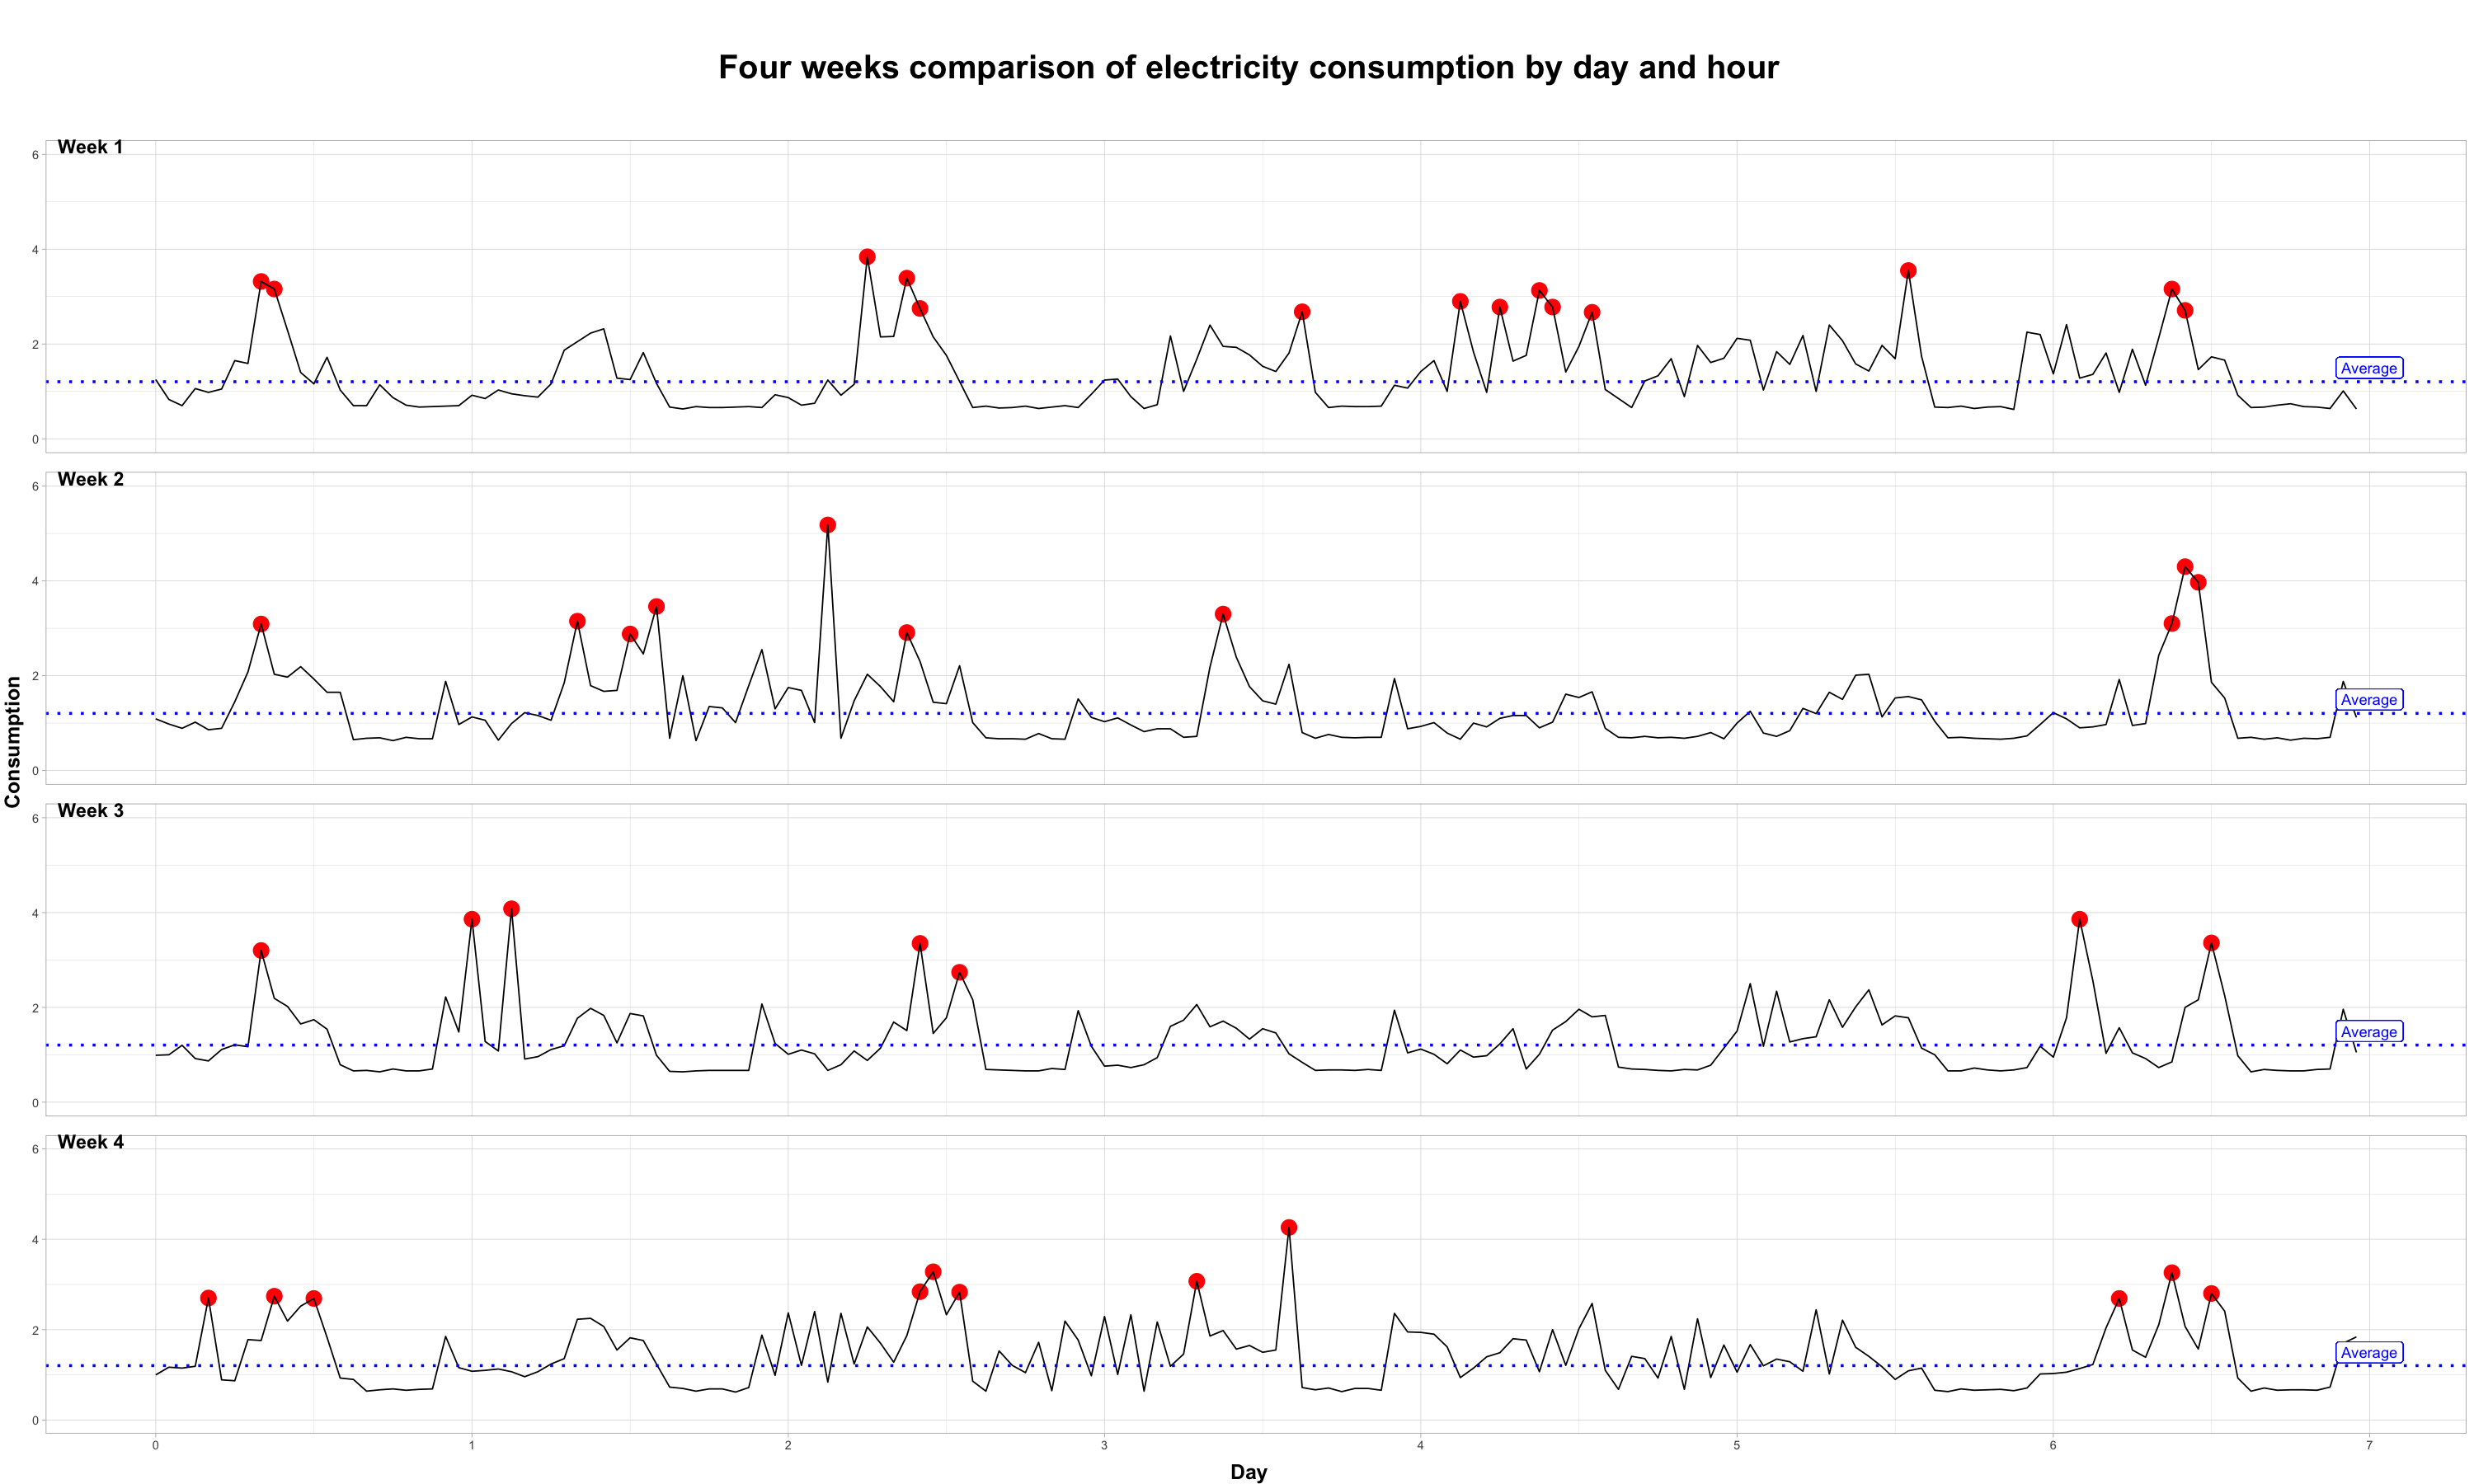

In [8]:
# Visualization of electricity consumption per day and hour
# Set configuration for plot size
options(repr.plot.width = 25, repr.plot.height = 15)

# Plot definitions
plt_wk1    <- ggplot(ElecDayHourWeekOneDF,    aes(x = instant, y = consumption)) + 
                geom_point(alpha = week_one_charac$alpha, size = week_one_charac$size, color = week_one_charac$color) + 
                geom_line()  + 
                scale_x_continuous(breaks = 0:7, labels = 0:7) + theme_light()
plt_wk2    <- ggplot(ElecDayHourWeekTwoDF,    aes(x = instant, y = consumption)) + 
                geom_point(alpha = week_two_charac$alpha, size = week_two_charac$size, color = week_two_charac$color) + 
                geom_line()  + 
                scale_x_continuous(breaks = 0:7, labels = 0:7) + theme_light()
plt_wk3    <- ggplot(ElecDayHourWeekThreeDF,    aes(x = instant, y = consumption)) + 
                geom_point(alpha = week_three_charac$alpha, size = week_three_charac$size, color = week_three_charac$color) + 
                geom_line()  + 
                scale_x_continuous(breaks = 0:7, labels = 0:7) + theme_light()
plt_wk4    <- ggplot(ElecDayHourWeekFourDF,    aes(x = instant, y = consumption)) + 
                geom_point(alpha = week_four_charac$alpha, size = week_four_charac$size, color = week_four_charac$color) + 
                geom_line()  + 
                scale_x_continuous(breaks = 0:7, labels = 0:7) + theme_light()

# Grid of plots definition
grid_1 <- plot_grid(
    plt_wk1 + ylim(0, 6) + geom_hline(yintercept = avg_hour_consumption, color = "blue", linetype = "dotted", linewidth = 1) + 
        theme(axis.text.x = element_blank(), axis.ticks.x = element_blank(), axis.title.x = element_blank(), axis.title.y = element_blank()) + geom_label(label = "Average", x = 7, y = 1.5, color = "blue"), 
    plt_wk2 + ylim(0, 6) + geom_hline(yintercept = avg_hour_consumption, color = "blue", linetype = "dotted", linewidth = 1) + 
        theme(axis.text.x = element_blank(), axis.ticks.x = element_blank(), axis.title.x = element_blank(), axis.title.y = element_blank()) + geom_label(label = "Average", x = 7, y = 1.5, color = "blue"),
    plt_wk3 + ylim(0, 6) + geom_hline(yintercept = avg_hour_consumption, color = "blue", linetype = "dotted", linewidth = 1) + 
        theme(axis.text.x = element_blank(), axis.ticks.x = element_blank(), axis.title.x = element_blank(), axis.title.y = element_blank()) + geom_label(label = "Average", x = 7, y = 1.5, color = "blue"),
    plt_wk4 + ylim(0, 6) + geom_hline(yintercept = avg_hour_consumption, color = "blue", linetype = "dotted", linewidth = 1) +
        theme(axis.title.x = element_blank(), axis.title.y = element_blank()) + geom_label(label = "Average", x = 7, y = 1.5, color = "blue"),
    labels = c("Week 1", "Week 2", "Week 3", "Week 4"),
    label_y = 1,
    ncol = 1, nrow = 4
)
# Titles definition
title       <- ggdraw() + draw_label("Four weeks comparison of electricity consumption by day and hour", fontface = "bold", size = 24)
x_title     <- textGrob("Day", gp = gpar(fontface="bold", col="black", fontsize = 15))
y_title     <- textGrob("Consumption", gp = gpar(fontface="bold", col="black", fontsize = 15), rot=90)
plot        <- plot_grid(title, grid_1, ncol = 1, rel_heights = c(0.1, 1))
# Arrange the plot to have global x and y titles
grid.arrange(arrangeGrob(plot, bottom = x_title, left = y_title))

### b) Hourly consumption

#### Base plot and configuration

In [9]:
base_plt_hour <- ggplot(ElecHourDF, aes(x = hour, y = consumption))
base_hline_hour <- geom_hline(yintercept = avg_hour_consumption, color = "blue", linetype = "dotted", linewidth = 1)
base_title_hour <- ggtitle("Distribution of electricity consumption by hour")
base_theme_hour <- theme_light() +
    theme(
        plot.title = element_text(hjust = 0.5, size = 24, face = "bold"),
        axis.title.x = element_text(size = 15, face = "bold"),
        axis.title.y = element_text(size = 15, face = "bold"),
        axis.text.x = element_text(size = 12),
        axis.text.y = element_text(size = 12)
    )

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”



#### Plot 1: Scatter plot with jitter

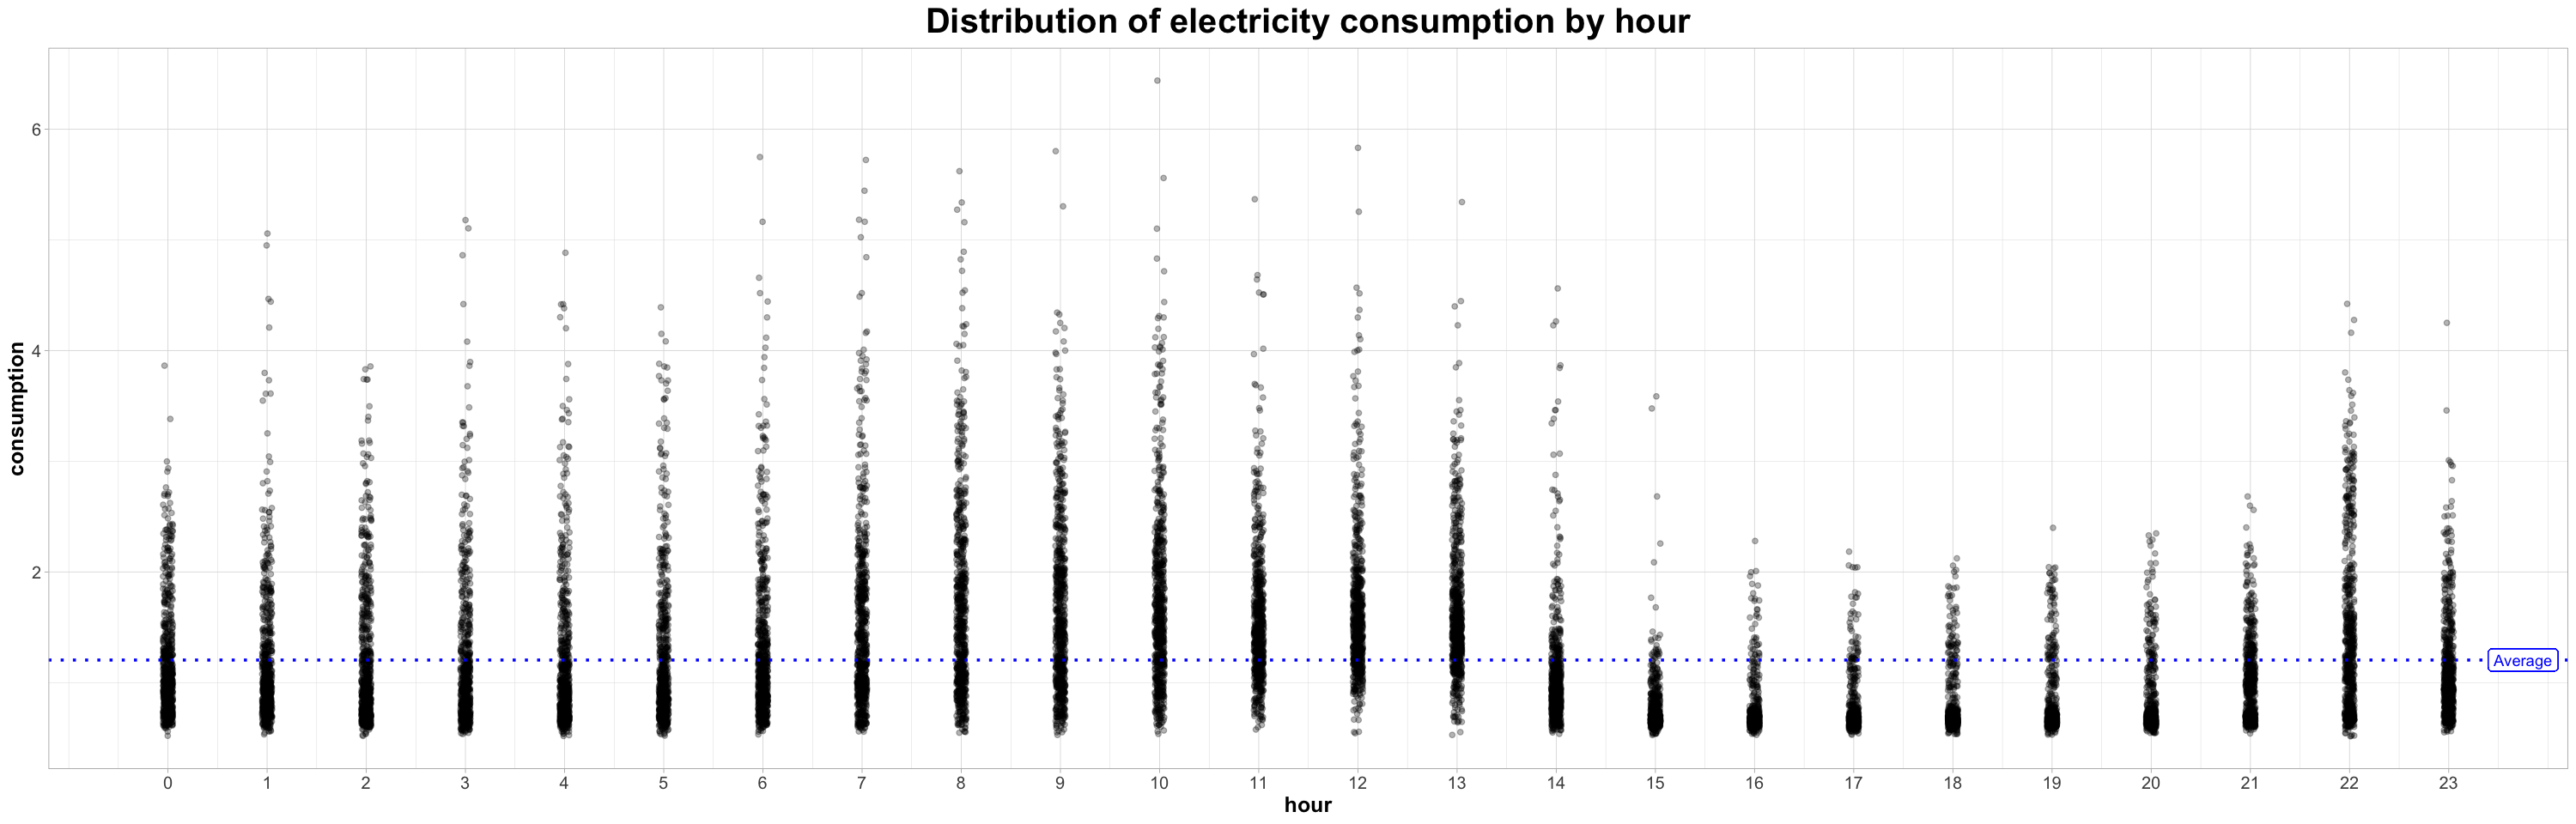

In [10]:
# Set configuration for plot size
options(repr.plot.width = 25, repr.plot.height = 8)
# Define scatter plot
base_plt_hour + 
    geom_jitter(alpha = 0.3, width = 0.05) + 
    scale_x_continuous(breaks = 0:23, labels = 0:23) +
    base_hline_hour +
    geom_label(label = "Average", x = 23.75, y = avg_hour_consumption, color = "blue") +
    base_title_hour +
    base_theme_hour

#### Plot 2: Boxplot

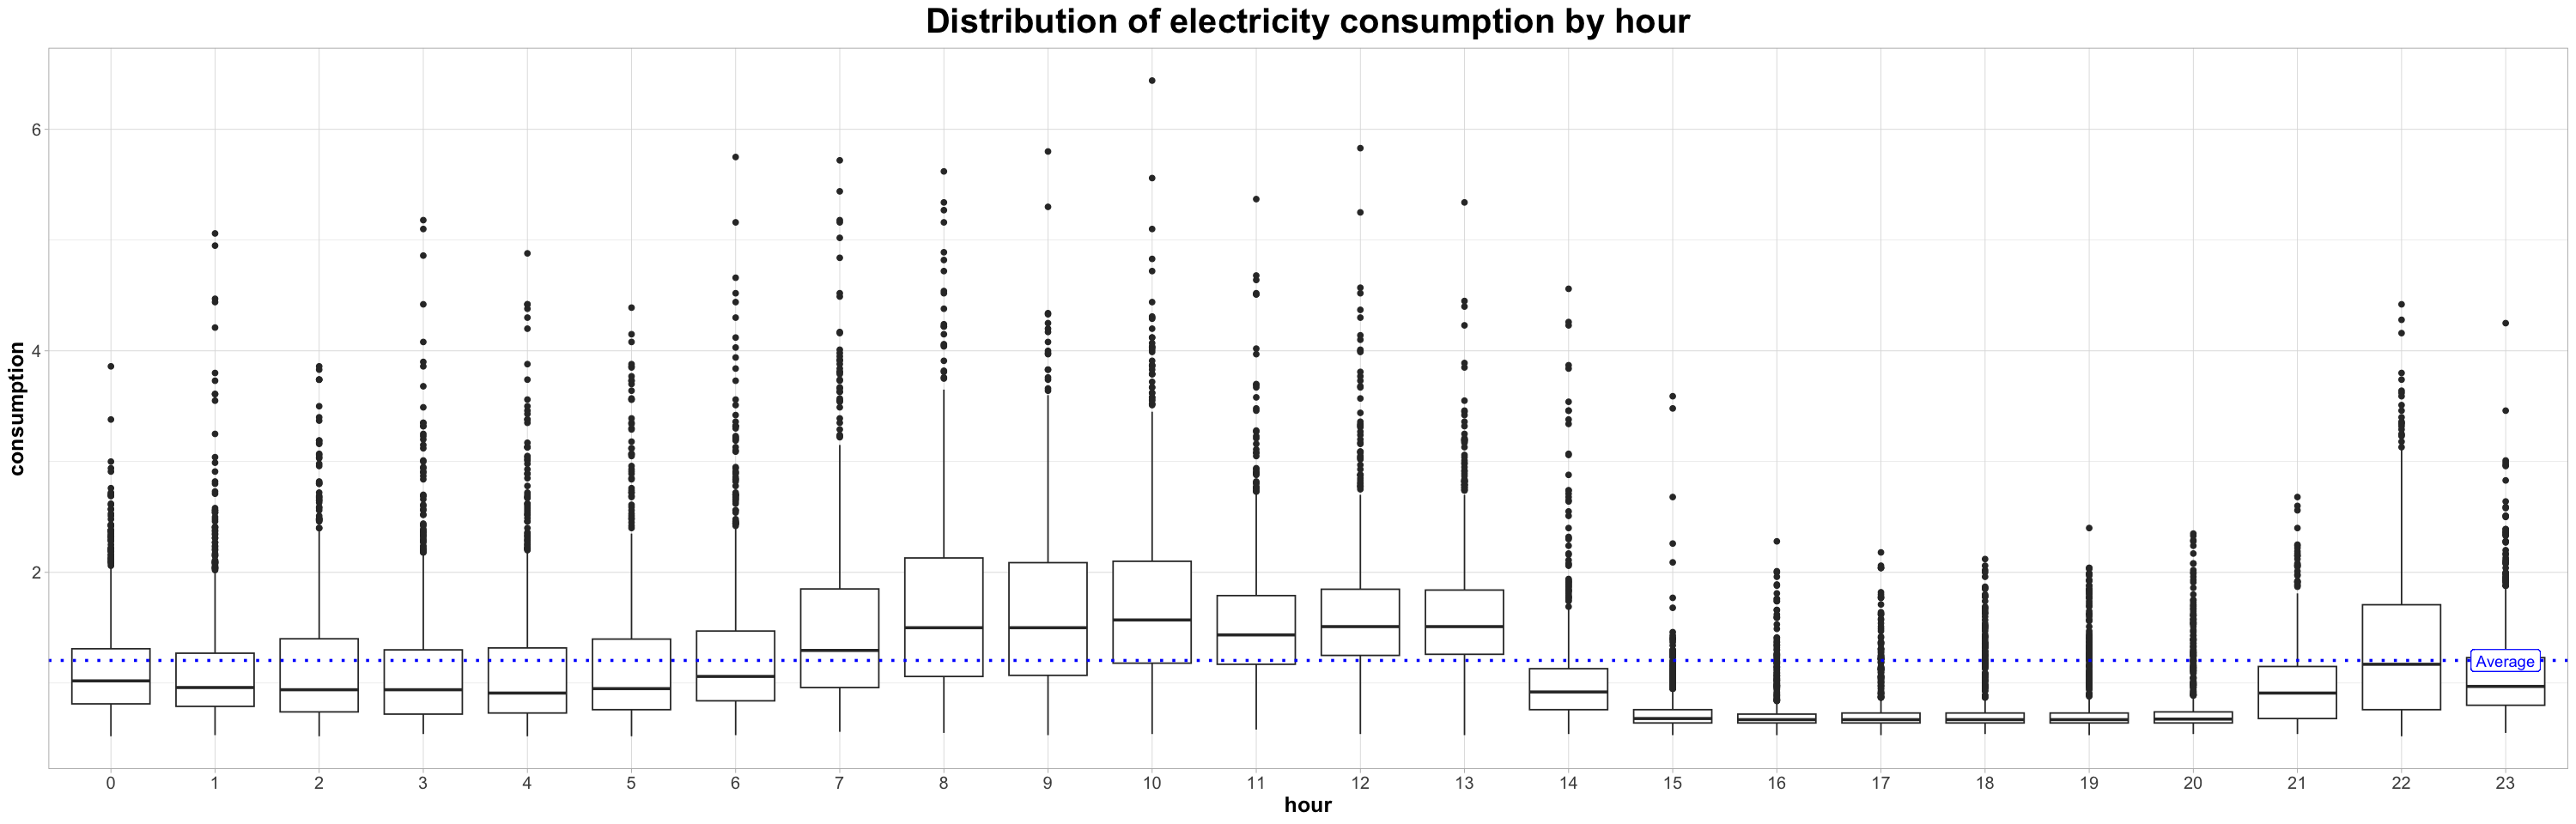

In [11]:
# Set configuration for plot size
options(repr.plot.width = 25, repr.plot.height = 8)
# Define box plot
base_plt_hour + 
    geom_boxplot(aes(x = factor(hour))) + 
    base_hline_hour +
    geom_label(label = "Average", x = 24, y = avg_hour_consumption, color = "blue") +
    base_title_hour +
    base_theme_hour

### c) Daily consumption

In [12]:
# Read daily electricity consumption data in csv file
ElecDayDF <- read_csv("../../curated/electricity/gold_daily_electricity.csv", show_col_types = FALSE)

In [13]:
# Define average consumption and outliers
avg_daily_consumption <- mean(ElecDayDF$consumption)

#### Base plot and configuration

In [14]:
base_plt_day <- ggplot(ElecDayDF, aes(x = day, y = consumption))
base_hline_day <- geom_hline(yintercept = avg_daily_consumption, color = "blue", linetype = "dotted", size = 1)
base_title_day <- ggtitle("Distribution of electricity consumption by day")
base_theme_day <- theme_light() +
    theme(
        plot.title = element_text(hjust = 0.5, size = 24, face = "bold"),
        axis.title.x = element_text(size = 15, face = "bold"),
        axis.title.y = element_text(size = 15, face = "bold"),
        axis.text.x = element_text(size = 12),
        axis.text.y = element_text(size = 12)
    )

#### Plot 1: Boxplot

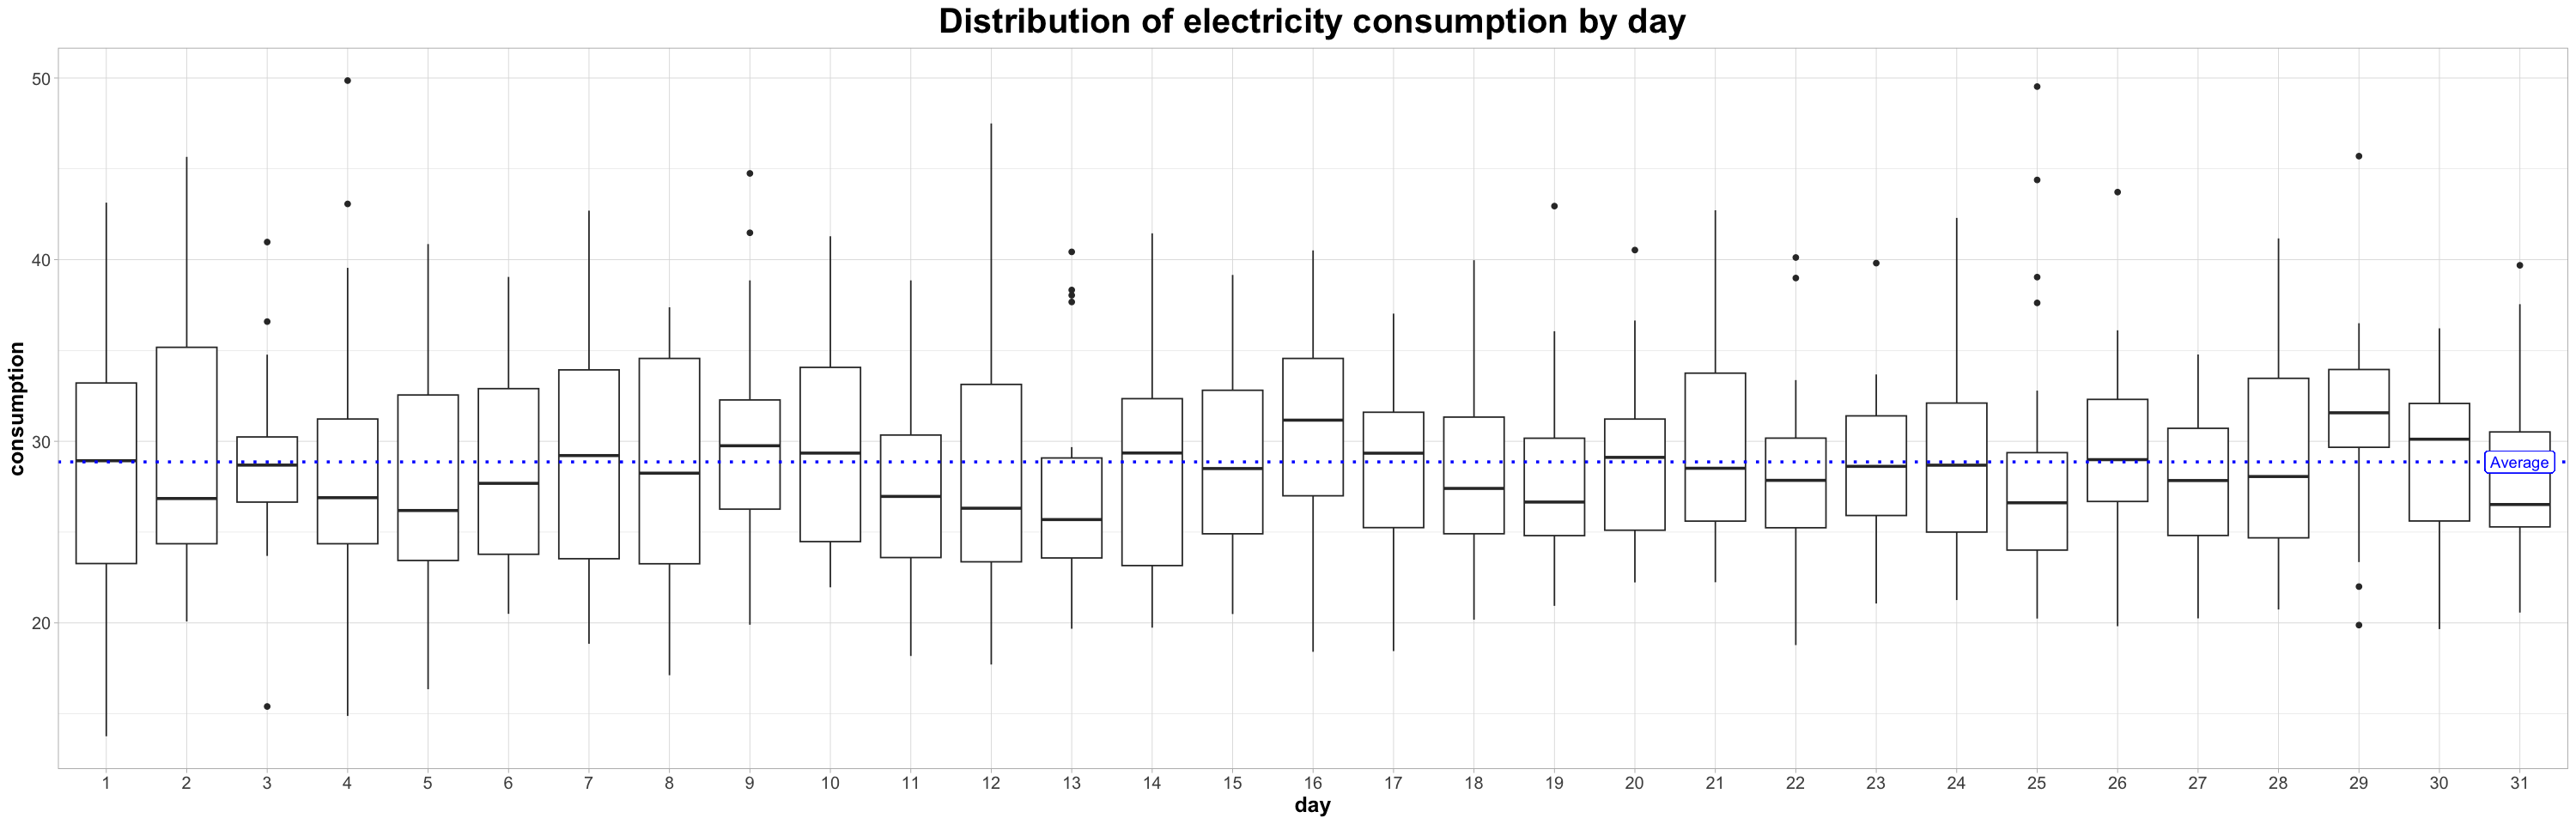

In [15]:
# Set configuration for plot size
options(repr.plot.width = 25, repr.plot.height = 8)
# Define boxplot
base_plt_day +
    geom_boxplot(aes(x = factor(day))) +
    base_hline_day +
    geom_label(label = "Average", x = 31, y = avg_daily_consumption, color = "blue", show.legend = TRUE) +
    base_title_day + 
    base_theme_day

#### Plot 2: Line plot

In [16]:
# Aggregate data by day number
ElecDayDF2 <- ElecDayDF %>%
    group_by(day) %>%
    summarize(
        consumption = sum(consumption)
    )
# Calculate average consumption
avg_daily_cons_2 <- mean(ElecDayDF2$consumption)

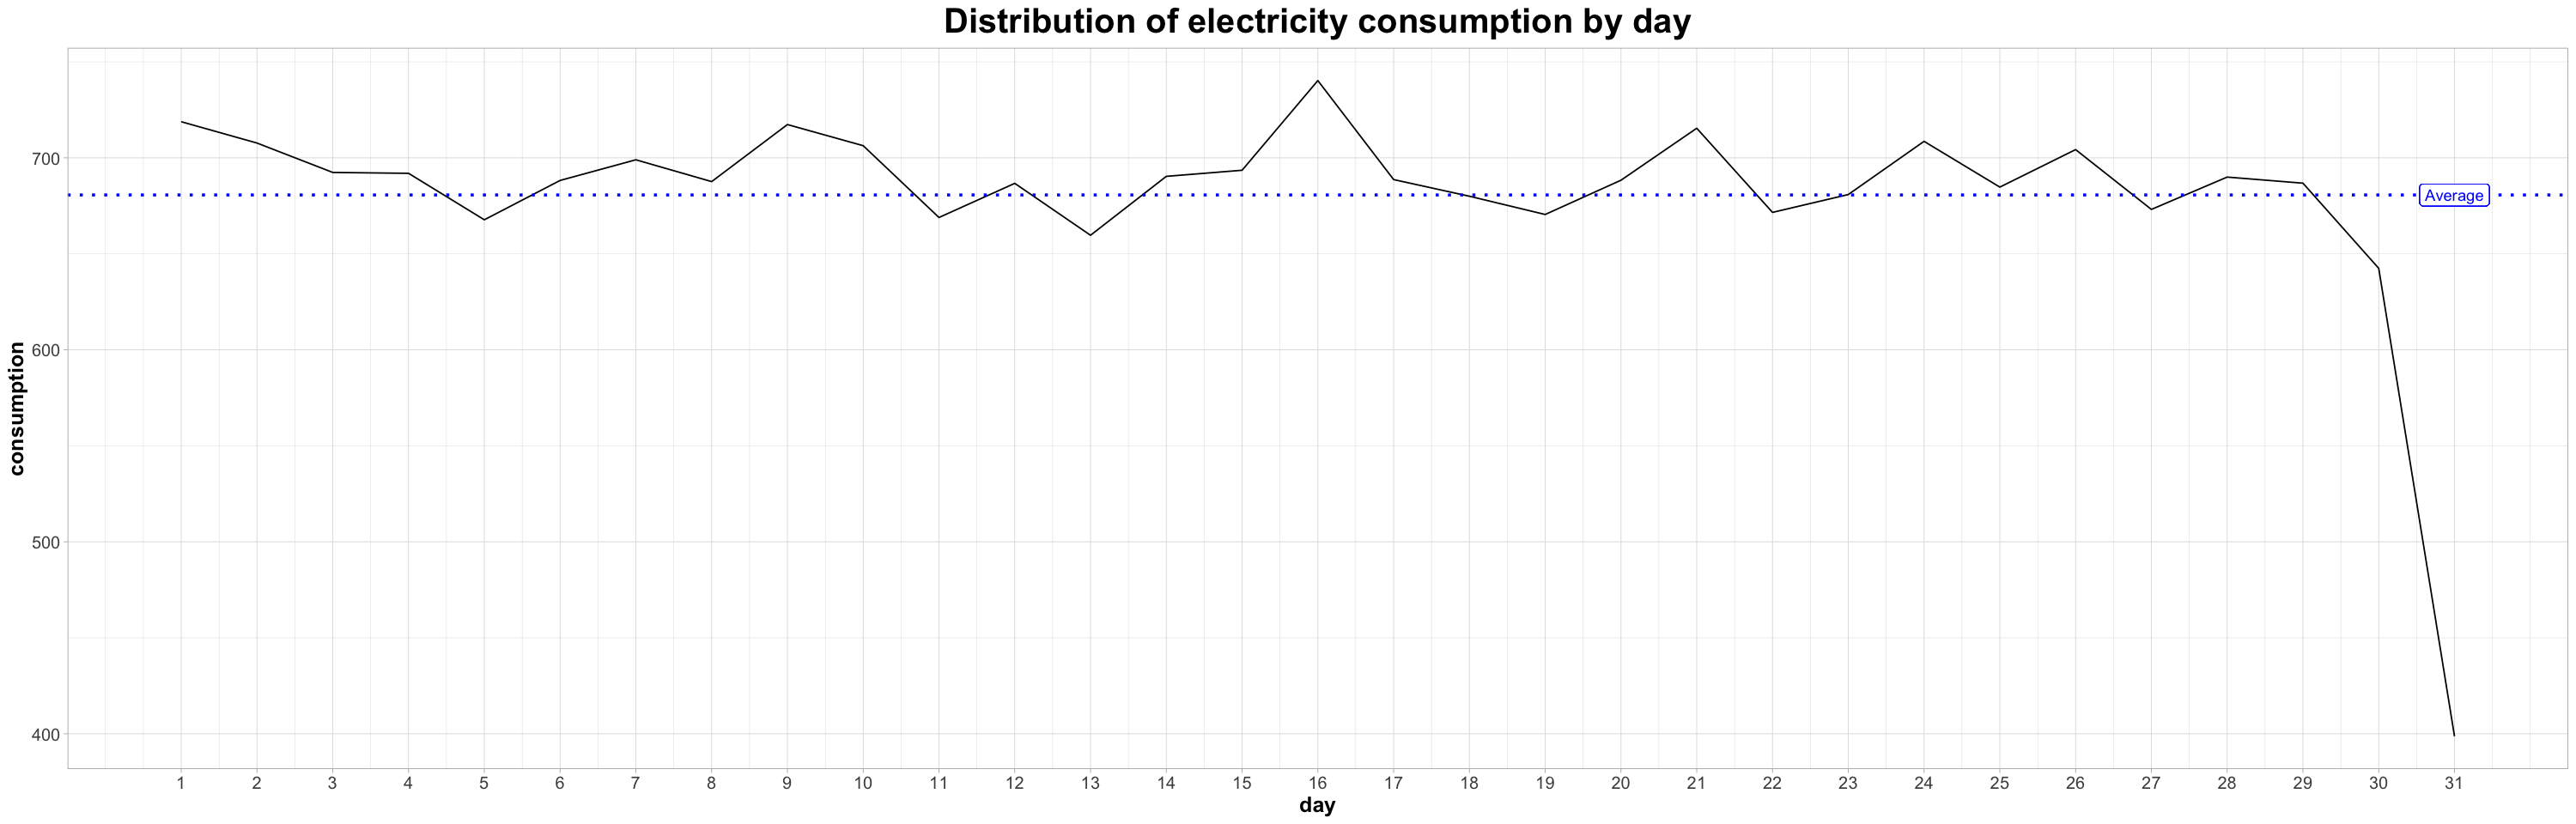

In [17]:
# Set configuration for plot size
options(repr.plot.width = 25, repr.plot.height = 8)
# Define line plot
ggplot(ElecDayDF2, aes(x = day, y = consumption)) +
    geom_line(aes(group = 1)) +
    geom_hline(yintercept = avg_daily_cons_2, color = "blue", linetype = "dotted", size = 1) +
    scale_x_continuous(breaks = 1:31, labels = 1:31, limits = c(1, 31)) +
    geom_label(label = "Average", x = 31, y = avg_daily_cons_2, color = "blue") +
    base_title_day + 
    base_theme_day

### d) Monthly consumption

In [58]:
# Read monthly electricity consumption data in csv file
ElecMonthDF <- read_csv("../../curated/electricity/gold_monthly_electricity.csv", show_col_types = FALSE)

In [59]:
# Define average consumption and outliers
avg_monthly_consumption <- mean(ElecMonthDF$consumption)
# Threshold: 95%
ElecMonthDF <- ElecMonthDF %>%
    mutate(
        isOutlier = consumption > quantile(consumption, 0.95),
        month_str = ifelse(nchar(month) == 1, paste0("0", as.character(month)), as.character(month)),
        year_month = factor(paste(year, month_str, sep = "-"))
    ) %>%
    select(-month_str)

#### Base plot and configuration

In [60]:
base_plt_month <- ggplot(ElecMonthDF, aes(x = month, y = consumption))
base_hline_month <- geom_hline(yintercept = avg_monthly_consumption, color = "blue", linetype = "dotted", size = 1)
base_title_month <- ggtitle("Distribution of electricity consumption by month")
base_theme_month <- theme_light() +
    theme(
        plot.title = element_text(hjust = 0.5, size = 24, face = "bold"),
        axis.title.x = element_text(size = 15, face = "bold"),
        axis.title.y = element_text(size = 15, face = "bold"),
        axis.text.x = element_text(size = 12),
        axis.text.y = element_text(size = 12)
    )

#### Plot 1: Boxplot

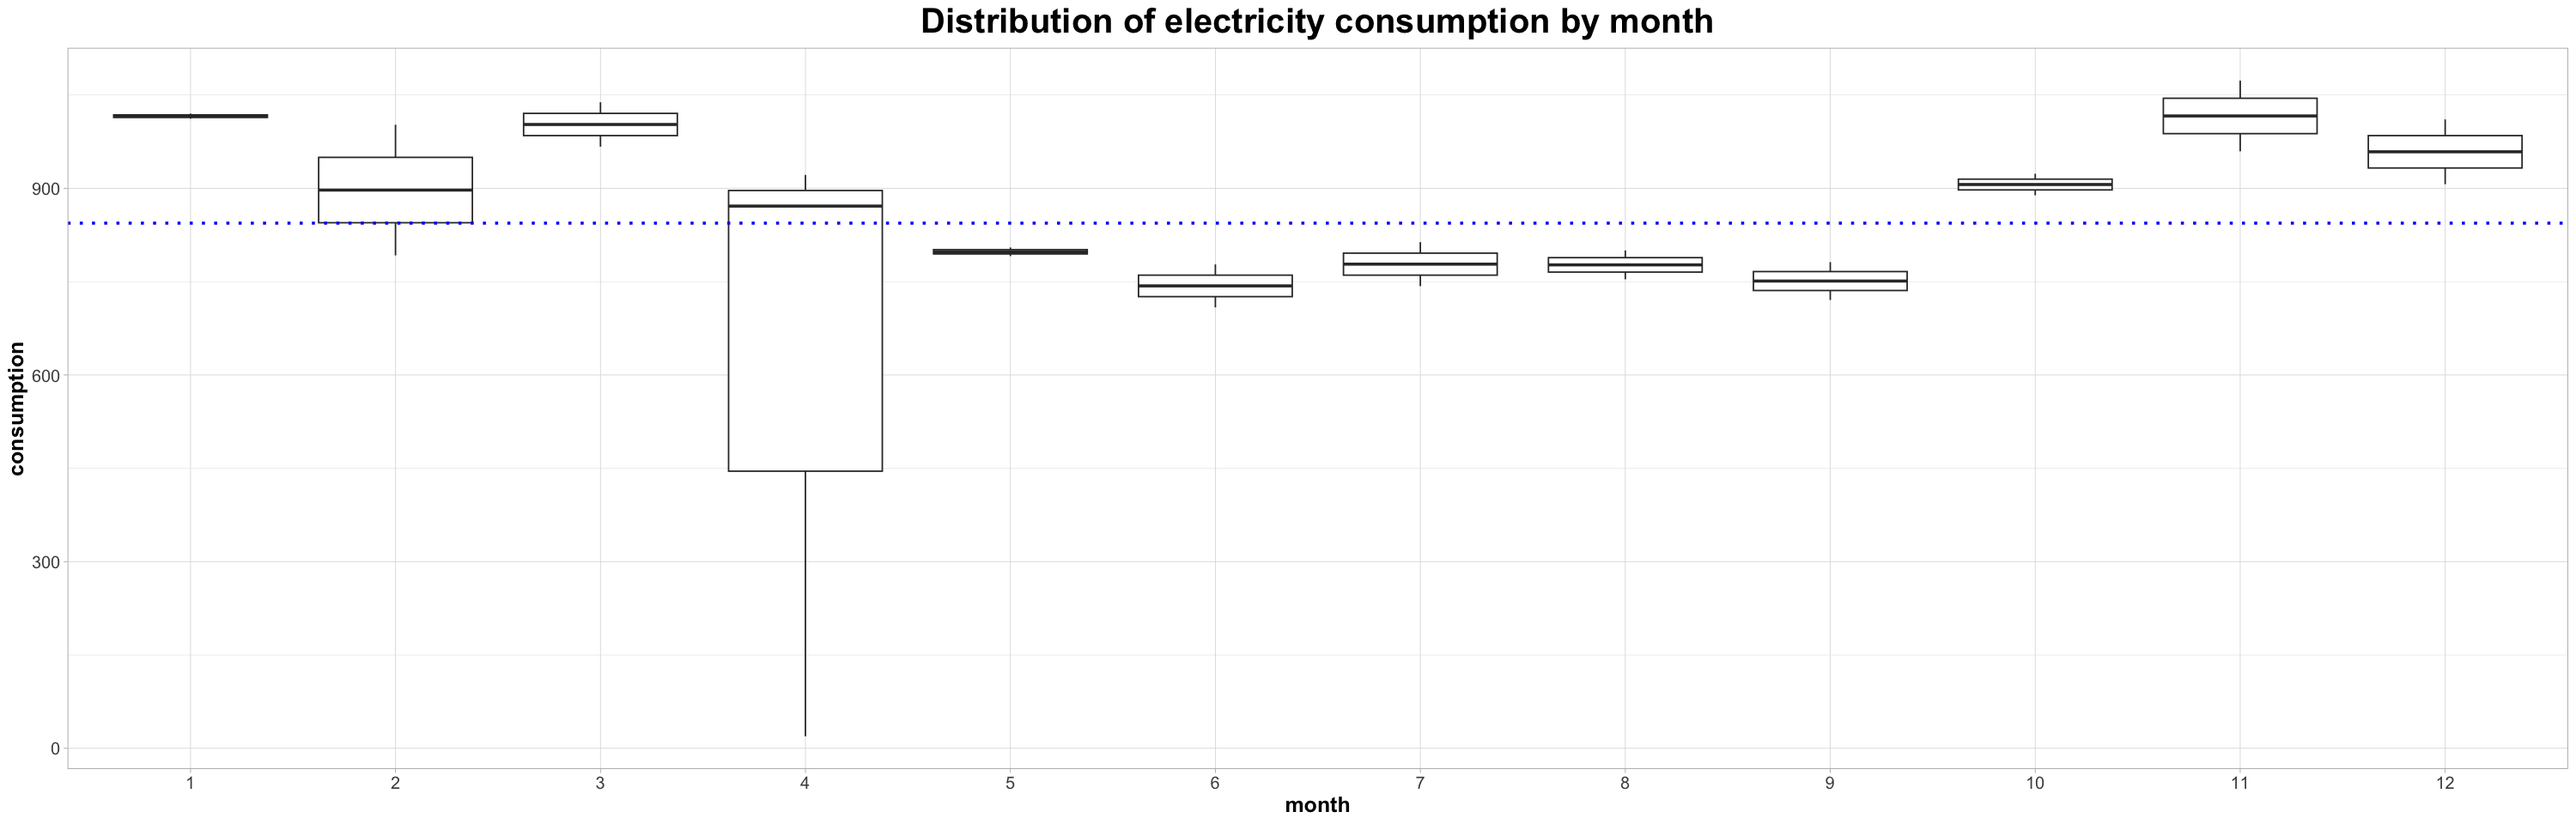

In [61]:
# Set configuration for plot size
options(repr.plot.width = 25, repr.plot.height = 8)
# Define boxplot
base_plt_month +
    geom_boxplot(aes(x = factor(month))) +
    base_hline_month +
    geom_label(label = "Average", x = 31, y = avg_monthly_consumption, color = "blue", show.legend = TRUE) +
    base_title_month + 
    base_theme_month

#### Plot 2: Line plot

In [62]:
# Aggregate data by month number
ElecMonthDF2 <- ElecMonthDF %>%
    group_by(month) %>%
    summarize(
        consumption = sum(consumption)
    )
# Calculate average consumption
avg_monthly_cons_2 <- mean(ElecMonthDF2$consumption)

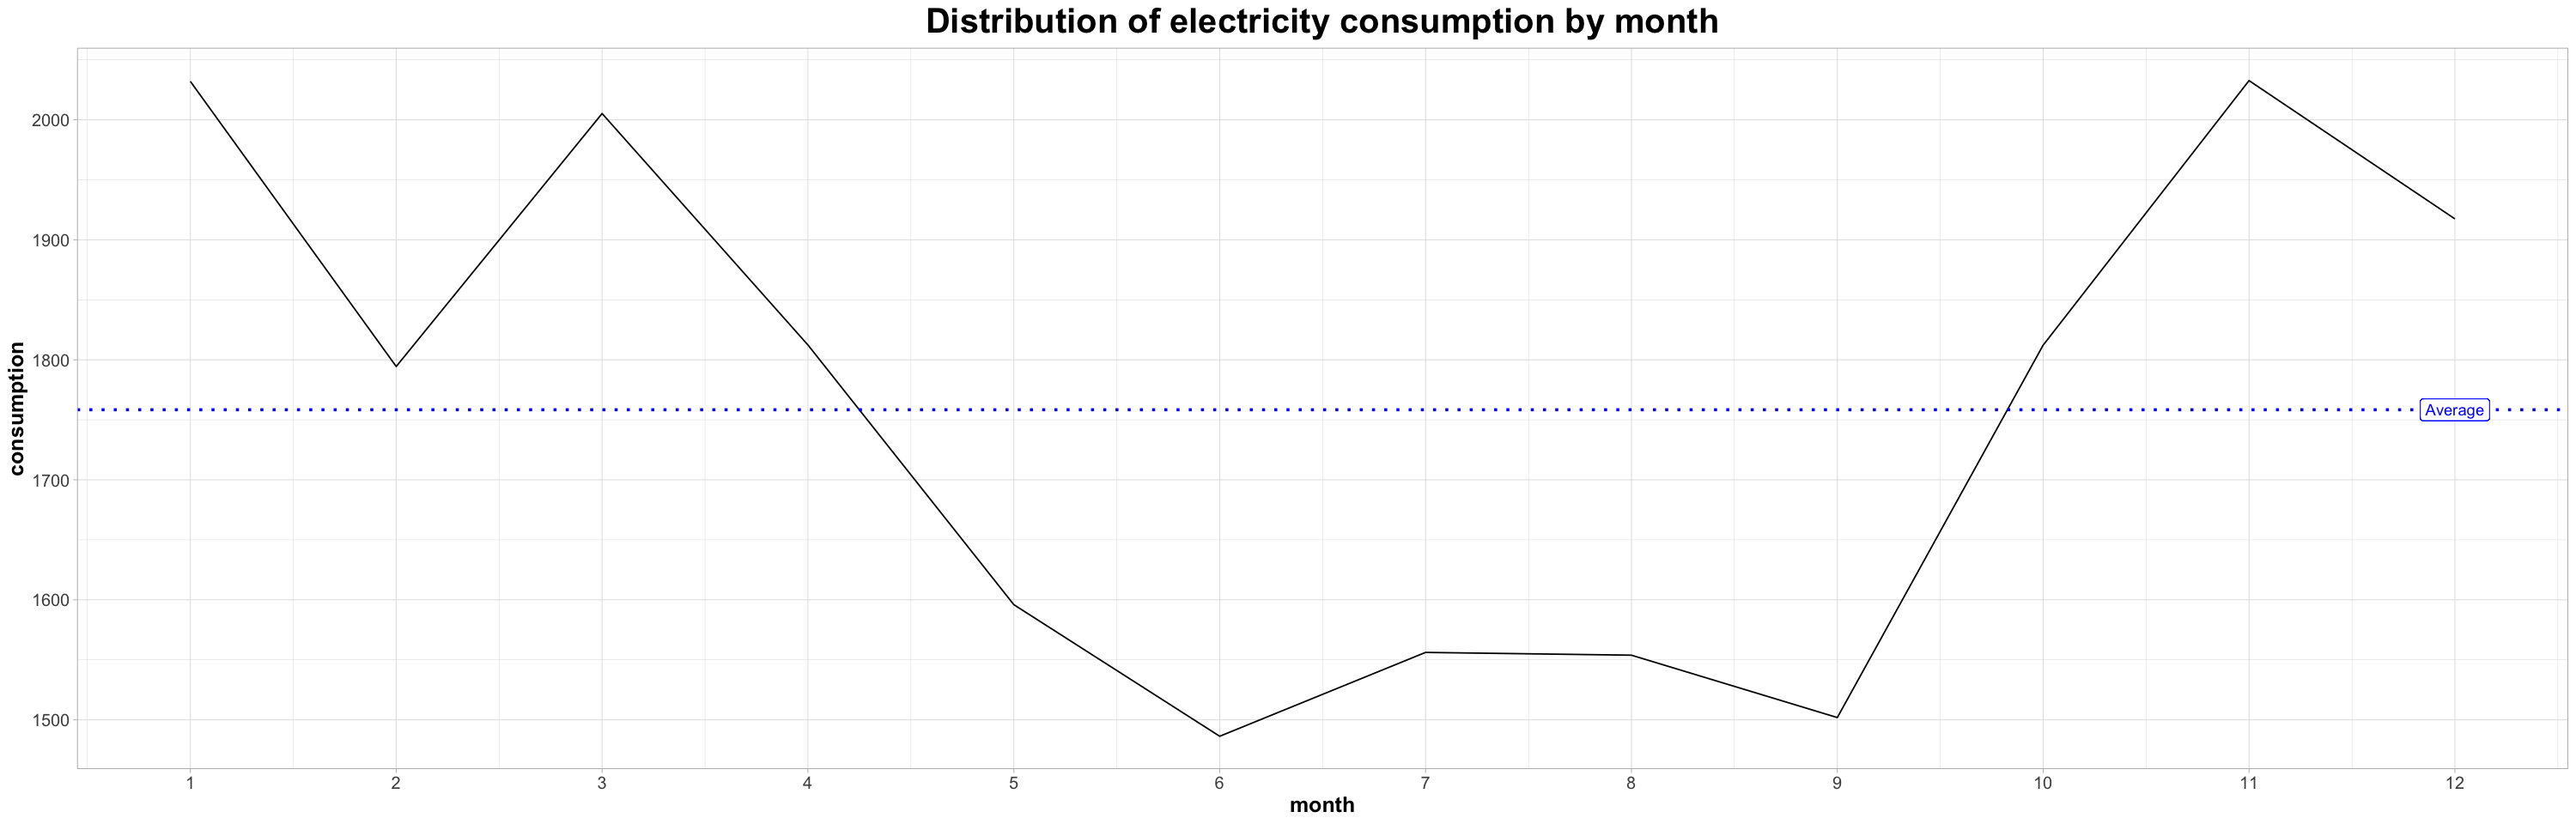

In [63]:
# Set configuration for plot size
options(repr.plot.width = 25, repr.plot.height = 8)
# Define line plot
ggplot(ElecMonthDF2, aes(x = month, y = consumption)) +
    geom_line(aes(group = 1)) +
    geom_hline(yintercept = avg_monthly_cons_2, color = "blue", linetype = "dotted", size = 1) +
    scale_x_continuous(breaks = 1:12, labels = 1:12, limits = c(1, 12)) +
    geom_label(label = "Average", x = 12, y = avg_monthly_cons_2, color = "blue") +
    base_title_month + 
    base_theme_month

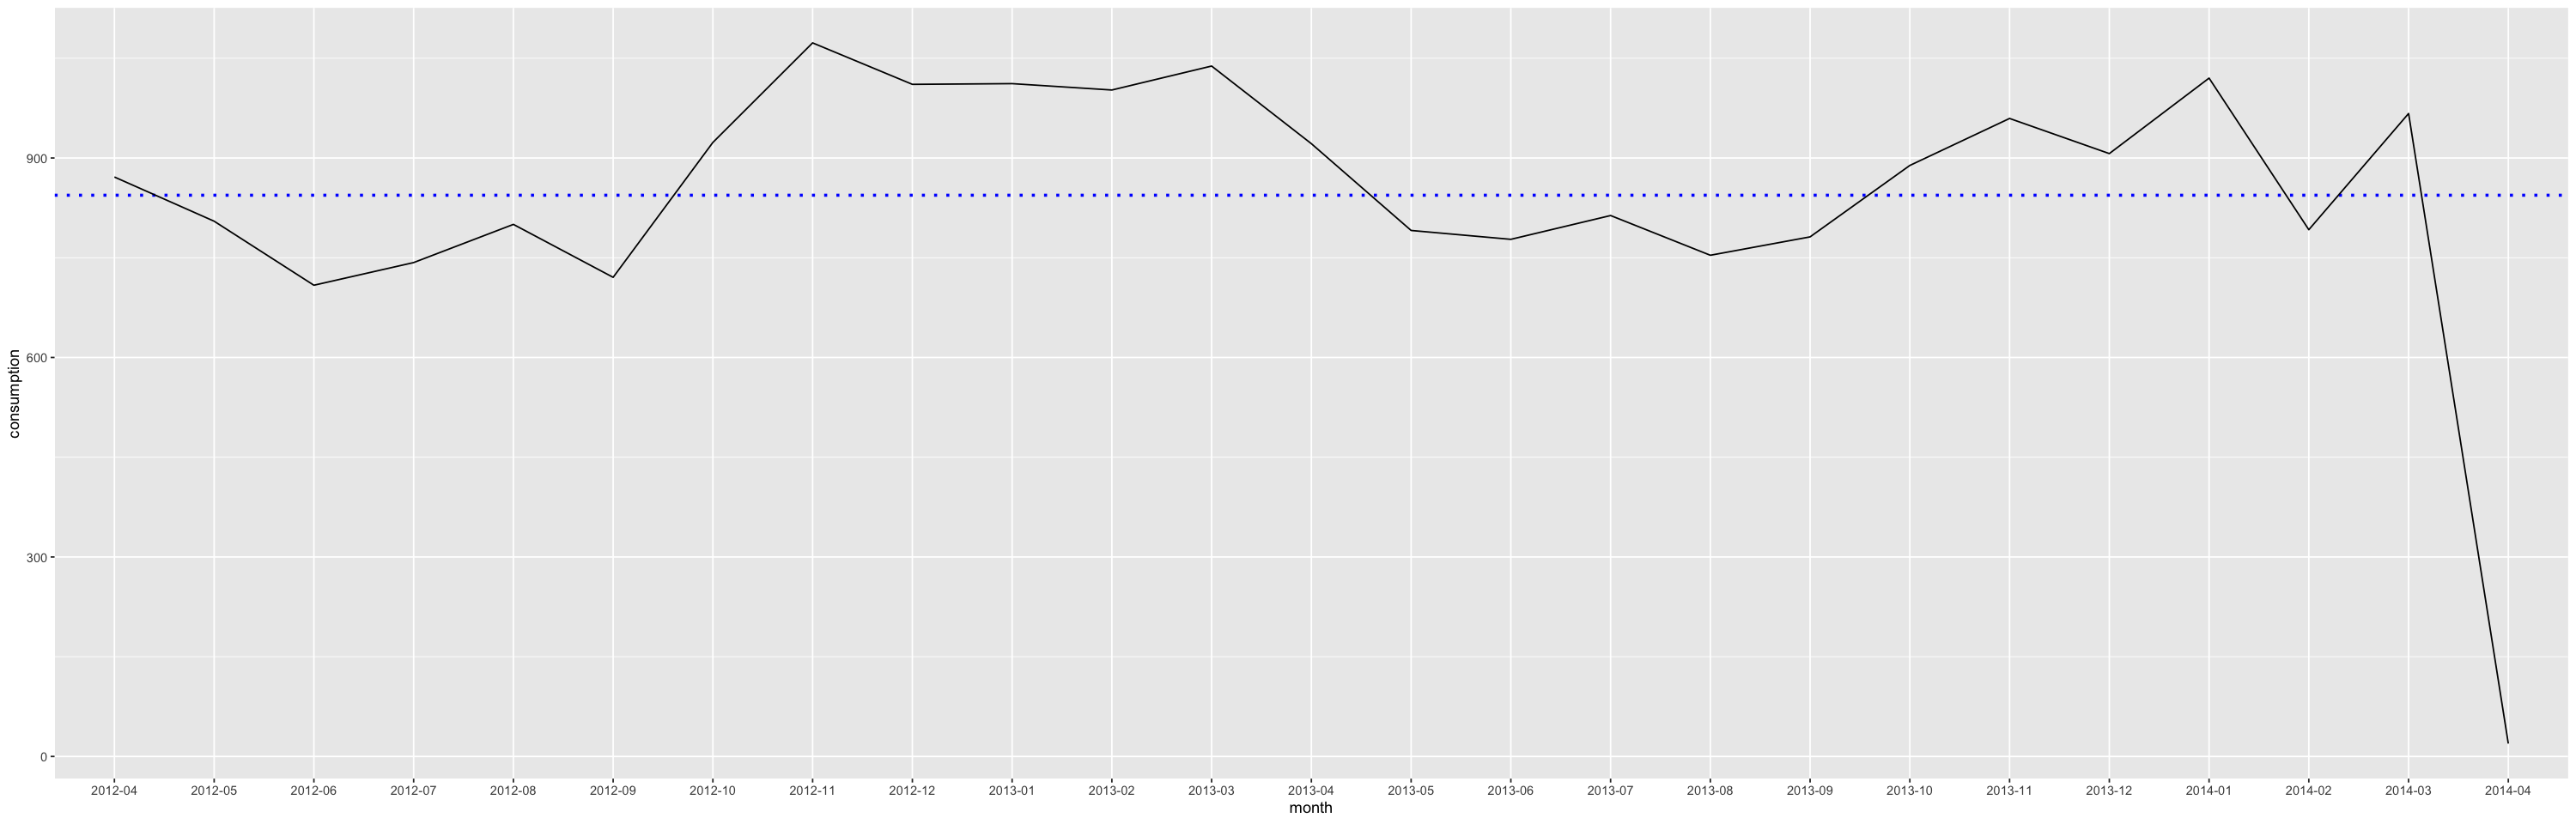

In [65]:
# Set configuration for plot size
options(repr.plot.width = 25, repr.plot.height = 8)
# Define boxplot
base_plt_month + base_hline_month +
    geom_line(aes(x = factor(year_month), group = 1))